- Scenario:  
  
You have been retained by a haulage company to analyse a dataset based on data collected from heavy Scania trucks in everyday usage. The system in focus is the Air Pressure system (APS) which generates pressurised air that are utilized in various functions in a truck, such as braking and gear changes. The dataset’s positive class consists of component failures for a specific component of the APS system.  The negative class consists of trucks with failures for components not related to the APS. The data consists of a subset of all available data, selected by experts. This analysis will help determine the investment strategy for the company in the upcoming year.   
  
All data wrangling, analysis, and visualizations must be generated using python.  
   
The companies CTO also requires you to rationalize all the decisions that you have made in your report.   
  
- Requirements:
  
You are required to use the dataset contained within the file “aps_failure_set.csv”, conduct the following analysis and report on your findings:  
  
Characterisation of the data set: size; number of attributes; has/does not have missing values, number of observations etc.  
  
Application of Data preparation/evaluation methods (Cleaning, renaming, etc) and EDA visualizations (plural), including a clear and concise explanation of your rationale for what you are doing with the data and why you are doing it.  
  
Use PCA to establish the minimum number of features needed for retaining 99.5% variance in the data and then implement PCA to dimensionally reduce the data to the number of features that you have discovered. Include a clear and concise explanation of your rationale for what you are doing with the data and why you are doing it.  
  
Explain in your own words what the “Curse of Dimensionality ” is.  
  
Conclusions, Findings of data set and references (HARVARD style).  
  
Note that all written work MUST be completed in Jupyter Notebook Markdown (please review “Jupyter Notebook Tutorial” Notes in Moodle if you are unsure of this).  
  
All Code must be included in code blocks (As normal). No other upload will be accepted.  
  
All written work MUST be detailed in your Jupyter Markdown (NOT in code comments).   


# Introduccion

We will analyze heavy truck data from transportation company Scania to help determine the company's investment strategy for the coming year.

The data that we will analyze is the air pressure system (APS) that is used in truck functions such as braking and gear changes.

The data is classified into:

- Positive Class: consists of component failures for a specific component of the APS system.


- Negative Class: consists of trucks with failures in components not related to the APS.


We will explain each step that will be taken during the exploration of the data and the analysis that we will be doing.

# Exploratory data analysis

### Importing the required libraries for EDA

With these libraries we will carry out our exploration of the data and our analysis, within our project we will add more libraries which we will use in the course of our analysis.

In [2]:
import pandas as pd
import math
import numpy as np
import scipy.stats as stats
from scipy.stats import binom
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline 
sns.set(color_codes=True) 

import warnings
warnings.filterwarnings('ignore')

### Loading the data into the data frame

Here we will load the data and create a variable to hold the data we parse, this syntax will return the columns and rows that our data frame contains.

The variable that we will create, which will contain our data frame, will be called "df_aps". (Panda Library)

In this case, it also shows us the number of rows 60,000 and the number of columns 171. We can also do this with the syntax "df_aps.shape"

In [3]:
df_aps = pd.read_csv('aps_failure_set.csv')
df_aps

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


### To display the top 5 rows

In [4]:
df_aps.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


### To display the bottom 5 rows

In [5]:
df_aps.tail()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0
59999,neg,40222,na,698,628,0,0,0,0,0,...,440066,183200,344546,254068,225148,158304,170384,158,0,0


# Checking the types of data

The "df_aps.dtypes" syntax is used to get the data type of each column in our Data Frame.

This attribute returns a string with the data type of each column.

Knowing the types of data that our DataFrame contains is important because it allows us to better understand the data we are working with and how we can manipulate it.

Furthermore, knowing the types of data also allows us to identify potential problems with our data, such as missing values or outliers.

In this case, most of the data is of a type object, so we may need to perform data cleansing to convert text values to numeric or date/time values.

In [6]:
df_aps.dtypes

class     object
aa_000     int64
ab_000    object
ac_000    object
ad_000    object
           ...  
ee_007    object
ee_008    object
ee_009    object
ef_000    object
eg_000    object
Length: 171, dtype: object

Another way to get information about our Data Frame is using the "df_aps.info()" syntax, this returns a concise description of the DataFrame, including the number of rows and columns, the number of non-null values in each column, and the type of data in each column.

This shows us the following:

- The first line indicates that the object is a Pandas Data Frame.


- The second line indicates that the Data Frame has 60,000 rows and 171 columns.


- The third line displays the names of the columns and their data types.


- The fourth line indicates that there is a column with numeric values (int64) and 170 columns with text values (object).


- The fifth line displays the amount of memory used by the Data Frame.

In [7]:
df_aps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB


We use the "df_aps.describe(include = object)" syntax to obtain descriptive statistics from our Data Frame. This returns a summary of the descriptive statistics of the columns of our Data Frame that have text values (object).

The "include = object" argument is used to include only the columns that have text values.

In this case, we get the descriptive statistical information since the variables of our Data Frame are of type (object) and not numeric.

So it gives us the following:

- The first line indicates the number of variables in each column (count).


- The second line indicates the number of unique values in each column, this parameter only applies to columns with categorical values (unique).


- The third line shows the most common values in each column (top).


- The fourth line indicates the number of times that the most frequent value appears in the column. The most frequent value found in the parameter (top) and (freq) is the number of times it appears.


- The fifth indicates that there are 4 rows and 170 columns.

In [8]:
df_aps.describe(include = object)

,class,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,...,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000
unique,2,30,2062,1887,334,419,155,618,2423,7880,...,34489,31712,35189,36289,31796,30470,24214,9725,29,50
top,neg,na,0,na,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,59000,46329,8752,14861,55543,55476,59133,58587,56181,46894,...,1364,1557,1797,2814,4458,7898,17280,31863,57021,56794


# Identify & Treat Missing Values

Before performing our analysis we must understand our data, identify missing values, identify and treat outliers, normalize and standardize our data, correct incorrect data, and document the process.

In the first instance, we will try to identify the missing values with the syntax "de_aps.isnull().sum()". Here we can see that when executing this syntax the sums are 0. Why does this happen?

This happens because the data we have in our Data Frame is of the "object" type, so the "isnull()" method will not work correctly, since the "object" type columns contain character strings and not numeric values.

In this case, we will use the "df_aps.isna().sum()" syntax, this syntax is similar to "isnull()", but it also considers values that can represent missing values in our columns like "None" and "NAN".

Again, running our second syntax, "df_aps.isna().sum()", we can see that the sums are 0.

None of our syntaxes can identify missing values, this is because there are possibly other values that represent missing values in our Data Frame, such as "NaN", "NA", "null", etc.

In this case, we must use the "replace()" syntax to be able to replace all these values with the null value "None" or "NaN". In this case, we will replace them with "NaN".

In [9]:
num_nulls_a = df_aps.isnull().sum()
print(num_nulls_a)

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64


In [10]:
num_nulls_b = df_aps.isna().sum()
print(num_nulls_b)

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64


In this case, we use the "replace()" method:


- df_aps: this is the variable that we created with our Data Frame in which we are going to perform the replacement.


- replace: this is the method used to perform the replacement.


- ["n.a."","?","NA","n/a", "na", "--"]: this is a list containing the values that we are going to replace. In this case, the values to be replaced are "n.a.", "?", "NA", "n/a", "na", and "--".


- np.nan: is the value to be used to replace the values in the list. In this case, the value to use is NaN (Not a Number), which is a value used to represent missing or invalid values.


- inplace = True: This tells us that the replacement should be done directly on the original Data Frame, instead of creating a new Data Frame. If this parameter is set to False or not specified, a new Data Frame will be created with the replaced values.

In [11]:
df_aps.replace(["n.a.","?","NA","n/a", "na", "--"], np.nan, inplace = True)
df_aps.head(10)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,NaN,0,NaN,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,NaN,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,NaN,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
5,neg,38312,NaN,2130706432,218,0,0,0,0,0,...,388574,288278,900430,300412,1534,338,856,0,0,0
6,neg,14,0,6,NaN,0,0,0,0,0,...,168,48,60,28,0,0,0,0,0,0
7,neg,102960,NaN,2130706432,116,0,0,0,0,0,...,715518,384948,915978,1052166,1108672,341532,129504,7832,0,0
8,neg,78696,NaN,0,NaN,0,0,0,0,0,...,699290,362510,1190028,1012704,160090,63216,41202,4,0,0
9,pos,153204,0,182,NaN,0,0,0,0,0,...,129862,26872,34044,22472,34362,0,0,0,0,0


Now we can see that both "isnull()" and "isna()" can identify missing values.

In [12]:
num_nulls_b = df_aps.isna().sum()
print(num_nulls_b)

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64


In [13]:
num_nulls_a = df_aps.isnull().sum()
print(num_nulls_a)

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64


In the syntax "df_aps.notnull().sum()" we can observe the non-null values of our Data Frame.

In [14]:
num_notnulls_c = df_aps.notnull().sum()
print(num_notnulls_c)

class     60000
aa_000    60000
ab_000    13671
ac_000    56665
ad_000    45139
          ...  
ee_007    59329
ee_008    59329
ee_009    59329
ef_000    57276
eg_000    57277
Length: 171, dtype: int64


Here we create a variable with all the values of the columns that contain the non-null values = False and the null values = True

In [15]:
missing_values = df_aps.isnull()
missing_values.head(10)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Here we create a list where we gather the null values and the non-null values where:

- False are non-null values
- True are null values

This makes it easier for us to observe the number of null and non-null values of each variable.

In [16]:
for column in missing_values.columns.values.tolist():
    print(column)
    print (missing_values[column].value_counts())
    print("")   

class
False    60000
Name: class, dtype: int64

aa_000
False    60000
Name: aa_000, dtype: int64

ab_000
True     46329
False    13671
Name: ab_000, dtype: int64

ac_000
False    56665
True      3335
Name: ac_000, dtype: int64

ad_000
False    45139
True     14861
Name: ad_000, dtype: int64

ae_000
False    57500
True      2500
Name: ae_000, dtype: int64

af_000
False    57500
True      2500
Name: af_000, dtype: int64

ag_000
False    59329
True       671
Name: ag_000, dtype: int64

ag_001
False    59329
True       671
Name: ag_001, dtype: int64

ag_002
False    59329
True       671
Name: ag_002, dtype: int64

ag_003
False    59329
True       671
Name: ag_003, dtype: int64

ag_004
False    59329
True       671
Name: ag_004, dtype: int64

ag_005
False    59329
True       671
Name: ag_005, dtype: int64

ag_006
False    59329
True       671
Name: ag_006, dtype: int64

ag_007
False    59329
True       671
Name: ag_007, dtype: int64

ag_008
False    59329
True       671
Name: ag_008, dtype:

Now, an easier way to be able to observe and analyze what proportion of the null values correspond to the non-null values in each column is by using percentages.

Here we will create a table in ascending order with each column to identify the number of null values in percentages.

In [17]:
total_nulls = df_aps.isnull().sum().sort_values(ascending = False)
percent_nulls = (df_aps.isnull().sum() / df_aps.isnull().count()).sort_values(ascending = False) * 100
missing_values = pd.concat([total_nulls,percent_nulls], axis = 1, keys = ['Total Nulls', 'Percent Nulls'])
missing_values.head(15).applymap(lambda x: f"{x:.2f}%" if isinstance (x, float) else f"{x}")

,Total Nulls,Percent Nulls
br_000,49264,82.11%
bq_000,48722,81.20%
bp_000,47740,79.57%
bo_000,46333,77.22%
ab_000,46329,77.22%
cr_000,46329,77.22%
bn_000,44009,73.35%
bm_000,39549,65.92%
bl_000,27277,45.46%
bk_000,23034,38.39%


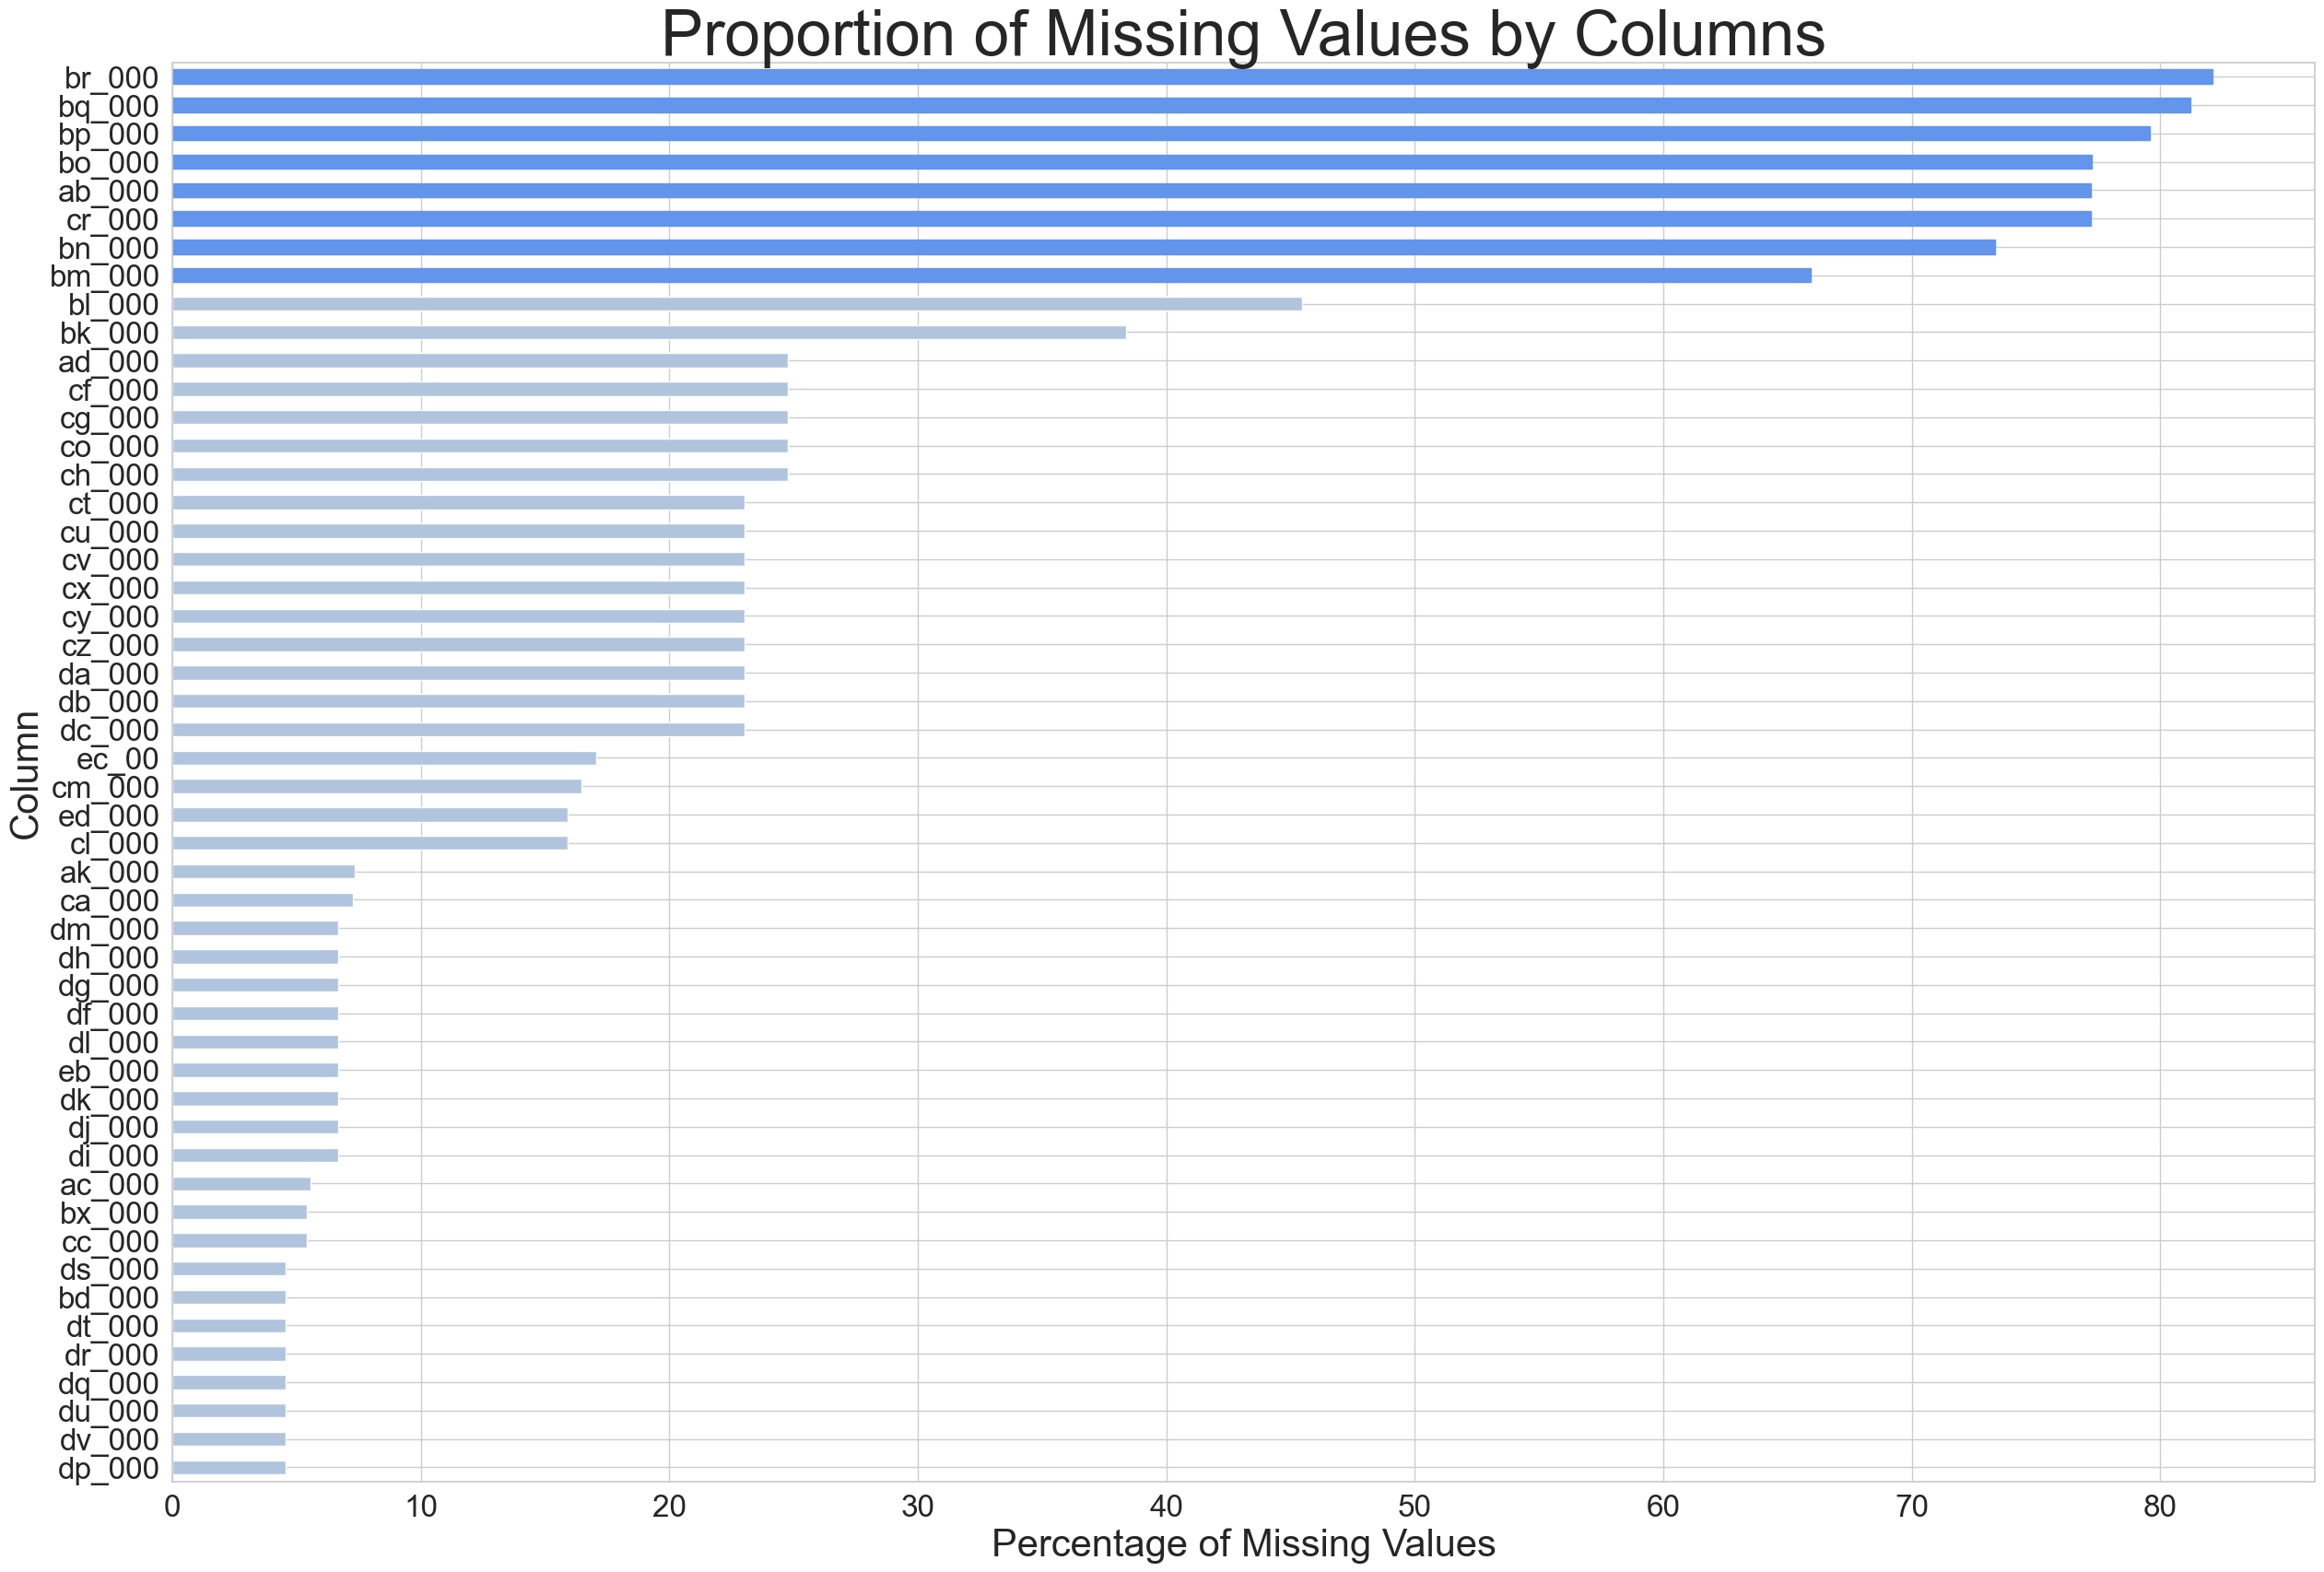

In [18]:
sns.set_theme(style="whitegrid")
top_missing = missing_values.head(50).sort_values(by='Percent Nulls', ascending=False)
g = top_missing['Percent Nulls'].plot(kind='barh', figsize=(30, 20), fontsize=24, color='lightsteelblue')
g.invert_yaxis()
g.set_title('Proportion of Missing Values by Columns', fontsize=50)
g.set_xlabel('Percentage of Missing Values', fontsize=30)
g.set_ylabel('Column', fontsize=30)

bars = g.containers[0][:8]

for i in range(len(bars)):
    bars[i].set_color('cornflowerblue')
    
plt.show()

## To delete or not to delete, that is the question

It is important to note that removing a column with missing or null values can be a bit of a drastic decision and is not always the best option.

Sometimes other data imputation techniques can be used to fill in missing values instead of removing them, such as:

- Replace missing values with mean values

- Replace the values with the percentiles, which can be 25th percentile, 50th percentile and 75th percentile

- We can also replace the values with the mode

In short, there are different techniques to replace null values or missing values, this must be accommodated depending on the analysis we are carrying out since if these data are important and we will use them in our analysis, it is not recommended to eliminate them.

However, if there are columns that will not be used in the analysis and you do not know what they indicate, you can consider removing them if they are between 50%, 70% or more of the missing values, but it is always important to carefully evaluate the implications. of this decision and consider other techniques for handling missing data.


In this case, we will eliminate the columns with a percentage equal to or greater than 50%, which would be the first 8 columns with the highest percentage of missing or null data, leaving 163 columns in our Data Frame out of 171 that we previously had.

In [19]:
df_aps.drop(['br_000', 'bq_000', 'bp_000', 'bo_000', 'ab_000','cr_000', 'bn_000', 'bm_000'], axis=1, inplace = True)

In [20]:
df_aps.head(10)

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,2130706438,280,0,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,0,NaN,0,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,228,100,0,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,70,66,0,10,0,0,0,318,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,1368,458,0,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
5,neg,38312,2130706432,218,0,0,0,0,0,0,...,388574,288278,900430,300412,1534,338,856,0,0,0
6,neg,14,6,NaN,0,0,0,0,0,0,...,168,48,60,28,0,0,0,0,0,0
7,neg,102960,2130706432,116,0,0,0,0,0,0,...,715518,384948,915978,1052166,1108672,341532,129504,7832,0,0
8,neg,78696,0,NaN,0,0,0,0,0,0,...,699290,362510,1190028,1012704,160090,63216,41202,4,0,0
9,pos,153204,182,NaN,0,0,0,0,0,11804,...,129862,26872,34044,22472,34362,0,0,0,0,0


After we have removed the columns with missing data greater than or equal to 50%, we will analyze the data found in our Data Frame.

We already know that our data is divided into two classes, Positive and Negative, where:

- Positive Class: consists of component failures for a specific component of the APS system.


- Negative Class: consists of trucks with failures in components not related to the APS.


We will analyze this column to know the amount and what is proportion of data that we have Positive vs. Negative.

- We will use the syntax "df_aps.nunique()" to count the number of unique values in each column of our Data Frame.


- We can also use the syntax "df_aps.unique()" which is used to count the number of unique values in each column of our Data Frame, but in this case, it will throw an error since this syntax is not a valid method for the values of type "object" that are the values that we have in our Data Frame.



In [21]:
df_aps.nunique()

class         2
aa_000    22095
ac_000     2061
ad_000     1886
ae_000      333
          ...  
ee_007    30469
ee_008    24213
ee_009     9724
ef_000       28
eg_000       49
Length: 163, dtype: int64

In [22]:
df_aps["class"].unique()

array(['neg', 'pos'], dtype=object)

Here we can see that we have a total of 59,000 negative cases and a total of 1,000 positive cases.

The proportion of positive cases vs. negative cases is only 1.67%, which is quite low and already indicates that the information could be biased.

In [23]:
df_aps["class"].value_counts()

neg    59000
pos     1000
Name: class, dtype: int64

Here we will replace the categorical data of type "object" in our "class" column with numeric "integer" data for better analysis.

Where:

- 0 = Negative Class

- 1 = Positive Class

Later we will make a horizontal bar graph for a better observation of the data.

In [24]:
df_aps['class'].replace('neg', 0, inplace = True)
df_aps['class'].replace('pos', 1, inplace = True)

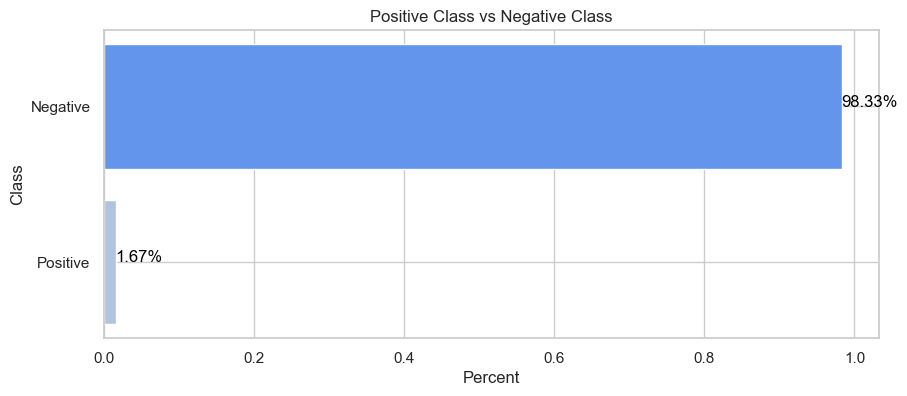

In [25]:
counts = df_aps['class'].value_counts()
percent_neg = counts[0] / len(df_aps)
percent_pos = counts[1] / len(df_aps)

colors = ['lightsteelblue','cornflowerblue']
labels = ['Negative', 'Positive']
values = [percent_neg, percent_pos]

data = list(zip(labels, values))
data.sort(key = lambda x: x[1], reverse = False)
labels, values = zip(*data)
plt.figure(figsize = (10, 4))
plt.barh(labels, values, color = colors)
for index, value in enumerate(values):
    plt.text(value - 0.0010, index - 0, f'{value:.2%}', fontsize = 12, color ='black', weight = '0')
plt.title('Positive Class vs Negative Class')
plt.xlabel('Percent')
plt.ylabel('Class')

plt.show()

Now what we will do is separate our dependent variable, which is the "class" column, from the other columns, which are our independent variables.

We do this so that we can more easily parse and clean our data, where we will then add our "class" column again.

In [26]:
df_aps_without_label =  df_aps.drop(["class"], axis = 1)
df_aps_without_label.head(-5)

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,2130706438,280,0,0,0,0,0,0,37250,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,33058,0,NaN,0,0,0,0,0,0,18254,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,41040,228,100,0,0,0,0,0,0,1648,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,12,70,66,0,10,0,0,0,318,2212,...,240,46,58,44,10,0,0,0,4,32
4,60874,1368,458,0,0,0,0,0,0,43752,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59990,81354,2130706432,156,0,0,0,0,0,0,62040,...,627610,376028,931828,1035236,674626,161266,3284,0,0,0
59991,39308,452,374,0,0,0,0,0,0,3564,...,312426,161694,323438,292350,250112,157636,234932,9506,0,0
59992,14,2,2,0,0,0,0,0,408,3274,...,132,44,80,52,54,0,0,0,0,0
59993,0,0,0,0,0,0,0,0,0,14,...,0,0,0,0,0,0,0,0,0,0


# Modification of Variables

Here we can see that our new Data Frame without the "class" column contains a column with data type "integer" and the other columns are of type "object".

So we will transform all the data types within our Data Frame without a label to "float".

We do this to leave all the columns of the same type and thus be able to modify them all at the same time without modifying them one by one; considering that we have 162 columns.

In [27]:
df_aps_without_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 162 entries, aa_000 to eg_000
dtypes: int64(1), object(161)
memory usage: 74.2+ MB


In [28]:
column_types = df_aps_without_label.dtypes
int_columns =  df_aps_without_label.select_dtypes(include=["int"]).columns

print(column_types)
print(int_columns)

aa_000     int64
ac_000    object
ad_000    object
ae_000    object
af_000    object
           ...  
ee_007    object
ee_008    object
ee_009    object
ef_000    object
eg_000    object
Length: 162, dtype: object
Index(['aa_000'], dtype='object')


Here we can see that when using the syntax ".describe()" it only shows us the column of type "integer" since the other columns are of type "object".

In [29]:
df_aps_without_label.describe()

,aa_000
count,6.000000e+04
mean,5.933650e+04
std,1.454301e+05
min,0.000000e+00
25%,8.340000e+02
50%,3.077600e+04
75%,4.866800e+04
max,2.746564e+06


We will use the ".astype()" syntax which changes the data type of a column to another data type, in this case, they will be replaced by a "float" data type.

This function takes a data type argument and returns a new string with the converted data.

In [30]:
df_aps_without_label = df_aps_without_label.astype(float)

Now that the columns have been converted from the "object" to the "float" type, using the syntax ".describe()" displays all of the columns.

In [31]:
df_aps_without_label.describe()

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,5.666500e+04,4.513900e+04,57500.000000,57500.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,...,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,57276.000000,57277.000000
mean,5.933650e+04,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,8.859128e+04,4.370966e+05,...,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,1.387300e+05,8.388915e+03,0.090579,0.212756
std,1.454301e+05,7.948749e+08,4.040441e+07,161.543373,209.792592,2.047846e+04,3.420053e+04,1.503220e+05,7.617312e+05,2.374282e+06,...,1.155540e+06,5.433188e+05,1.168314e+06,1.121044e+06,1.069160e+06,1.728056e+06,4.495100e+05,4.747043e+04,4.368855,8.830641
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.340000e+02,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.080000e+02,...,2.936000e+03,1.166000e+03,2.700000e+03,3.584000e+03,5.120000e+02,1.100000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.077600e+04,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.672000e+03,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,4.866800e+04,9.640000e+02,4.300000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.952200e+04,...,4.383960e+05,2.182320e+05,4.666140e+05,4.032220e+05,2.750940e+05,1.678140e+05,1.397240e+05,2.028000e+03,0.000000,0.000000
max,2.746564e+06,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,6.340207e+07,2.288306e+08,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


We still have "NaN" null data inside our Data Frame, even if we change the data types to "floats", so we need to clean this data up.

In [32]:
df_aps_without_label.isnull().sum()

aa_000        0
ac_000     3335
ad_000    14861
ae_000     2500
af_000     2500
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 162, dtype: int64

With this syntax, we will replace all the missing values or null values of our Data Frame with the median of each column.

Why do we use the Median and not the Average?

- We use the Median since the Average is highly influenced by the outlier values.

- On the other hand, the Median will take the Average value of each column without being influenced by the outliers.

The arguments that we are using in our syntax are:

- df_aps_without_label: this is the name of our DataFrame in which we are going to modify and fill in the null and missing values.


- fillna(): this is a method inside the panda's library and we use it to fill in the missing values.


- df_aps_without_label.median(): this is the value that you want to use to fill in the null and missing values. In this case, the median of each column of our Data Frame "df_aps_without_label" is being used.


- inplace=True: we use this argument to modify the original Data Frame "df_aps_without_label", that is, null values will be replaced directly in the original Data Frame without creating a copy.


In [33]:
df_aps_without_label.fillna(df_aps_without_label.median(), inplace = True)

In [34]:
df_aps_without_label.isnull().sum()

aa_000    0
ac_000    0
ad_000    0
ae_000    0
af_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 162, dtype: int64

We use the ".describe()" syntax once again after substituting the "NaN" for null data and the missing data to verify that there is no longer any null data.

After we have cleaned up our data, we can see the following with the .describe() syntax:

- We can see that the vast majority of the data are within "0".


- We have many outlier values.


- The Standard Deviation is shown with extremely high values, which indicates that our data is very scattered due to the outliers, which can also be observed with the Minimum values and the Maximum values.


- We have the 25th, 50th and 75th percentiles with values "0"

In addition, for better visualization, we make a histogram graph for each column, which shows us exactly that we have a large number of columns with variables equal to "0".

In [35]:
df_aps_without_label.describe()

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,...,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,60000.000000
mean,5.933650e+04,3.362258e+08,1.434383e+05,6.535000,10.548200,2.191577e+02,9.648104e+02,8.509771e+03,8.760054e+04,4.322495e+05,...,4.431223e+05,2.100188e+05,4.432268e+05,3.916653e+05,3.303672e+05,3.428586e+05,1.372212e+05,8.295099e+03,0.086467,0.203100
std,1.454301e+05,7.767625e+08,3.504525e+07,158.147893,205.387115,2.036364e+04,3.400891e+04,1.494818e+05,7.575171e+05,2.361408e+06,...,1.149276e+06,5.403725e+05,1.162002e+06,1.114964e+06,1.063465e+06,1.718666e+06,4.472145e+05,4.721249e+04,4.268570,8.628043
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.340000e+02,2.000000e+01,4.200000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.180000e+02,...,3.033500e+03,1.204000e+03,2.848500e+03,3.839000e+03,5.600000e+02,1.180000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.077600e+04,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.672000e+03,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,4.866800e+04,8.480000e+02,2.920000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.812400e+04,...,4.350315e+05,2.164440e+05,4.624655e+05,4.003010e+05,2.725220e+05,1.663465e+05,1.367255e+05,1.934000e+03,0.000000,0.000000
max,2.746564e+06,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,6.340207e+07,2.288306e+08,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


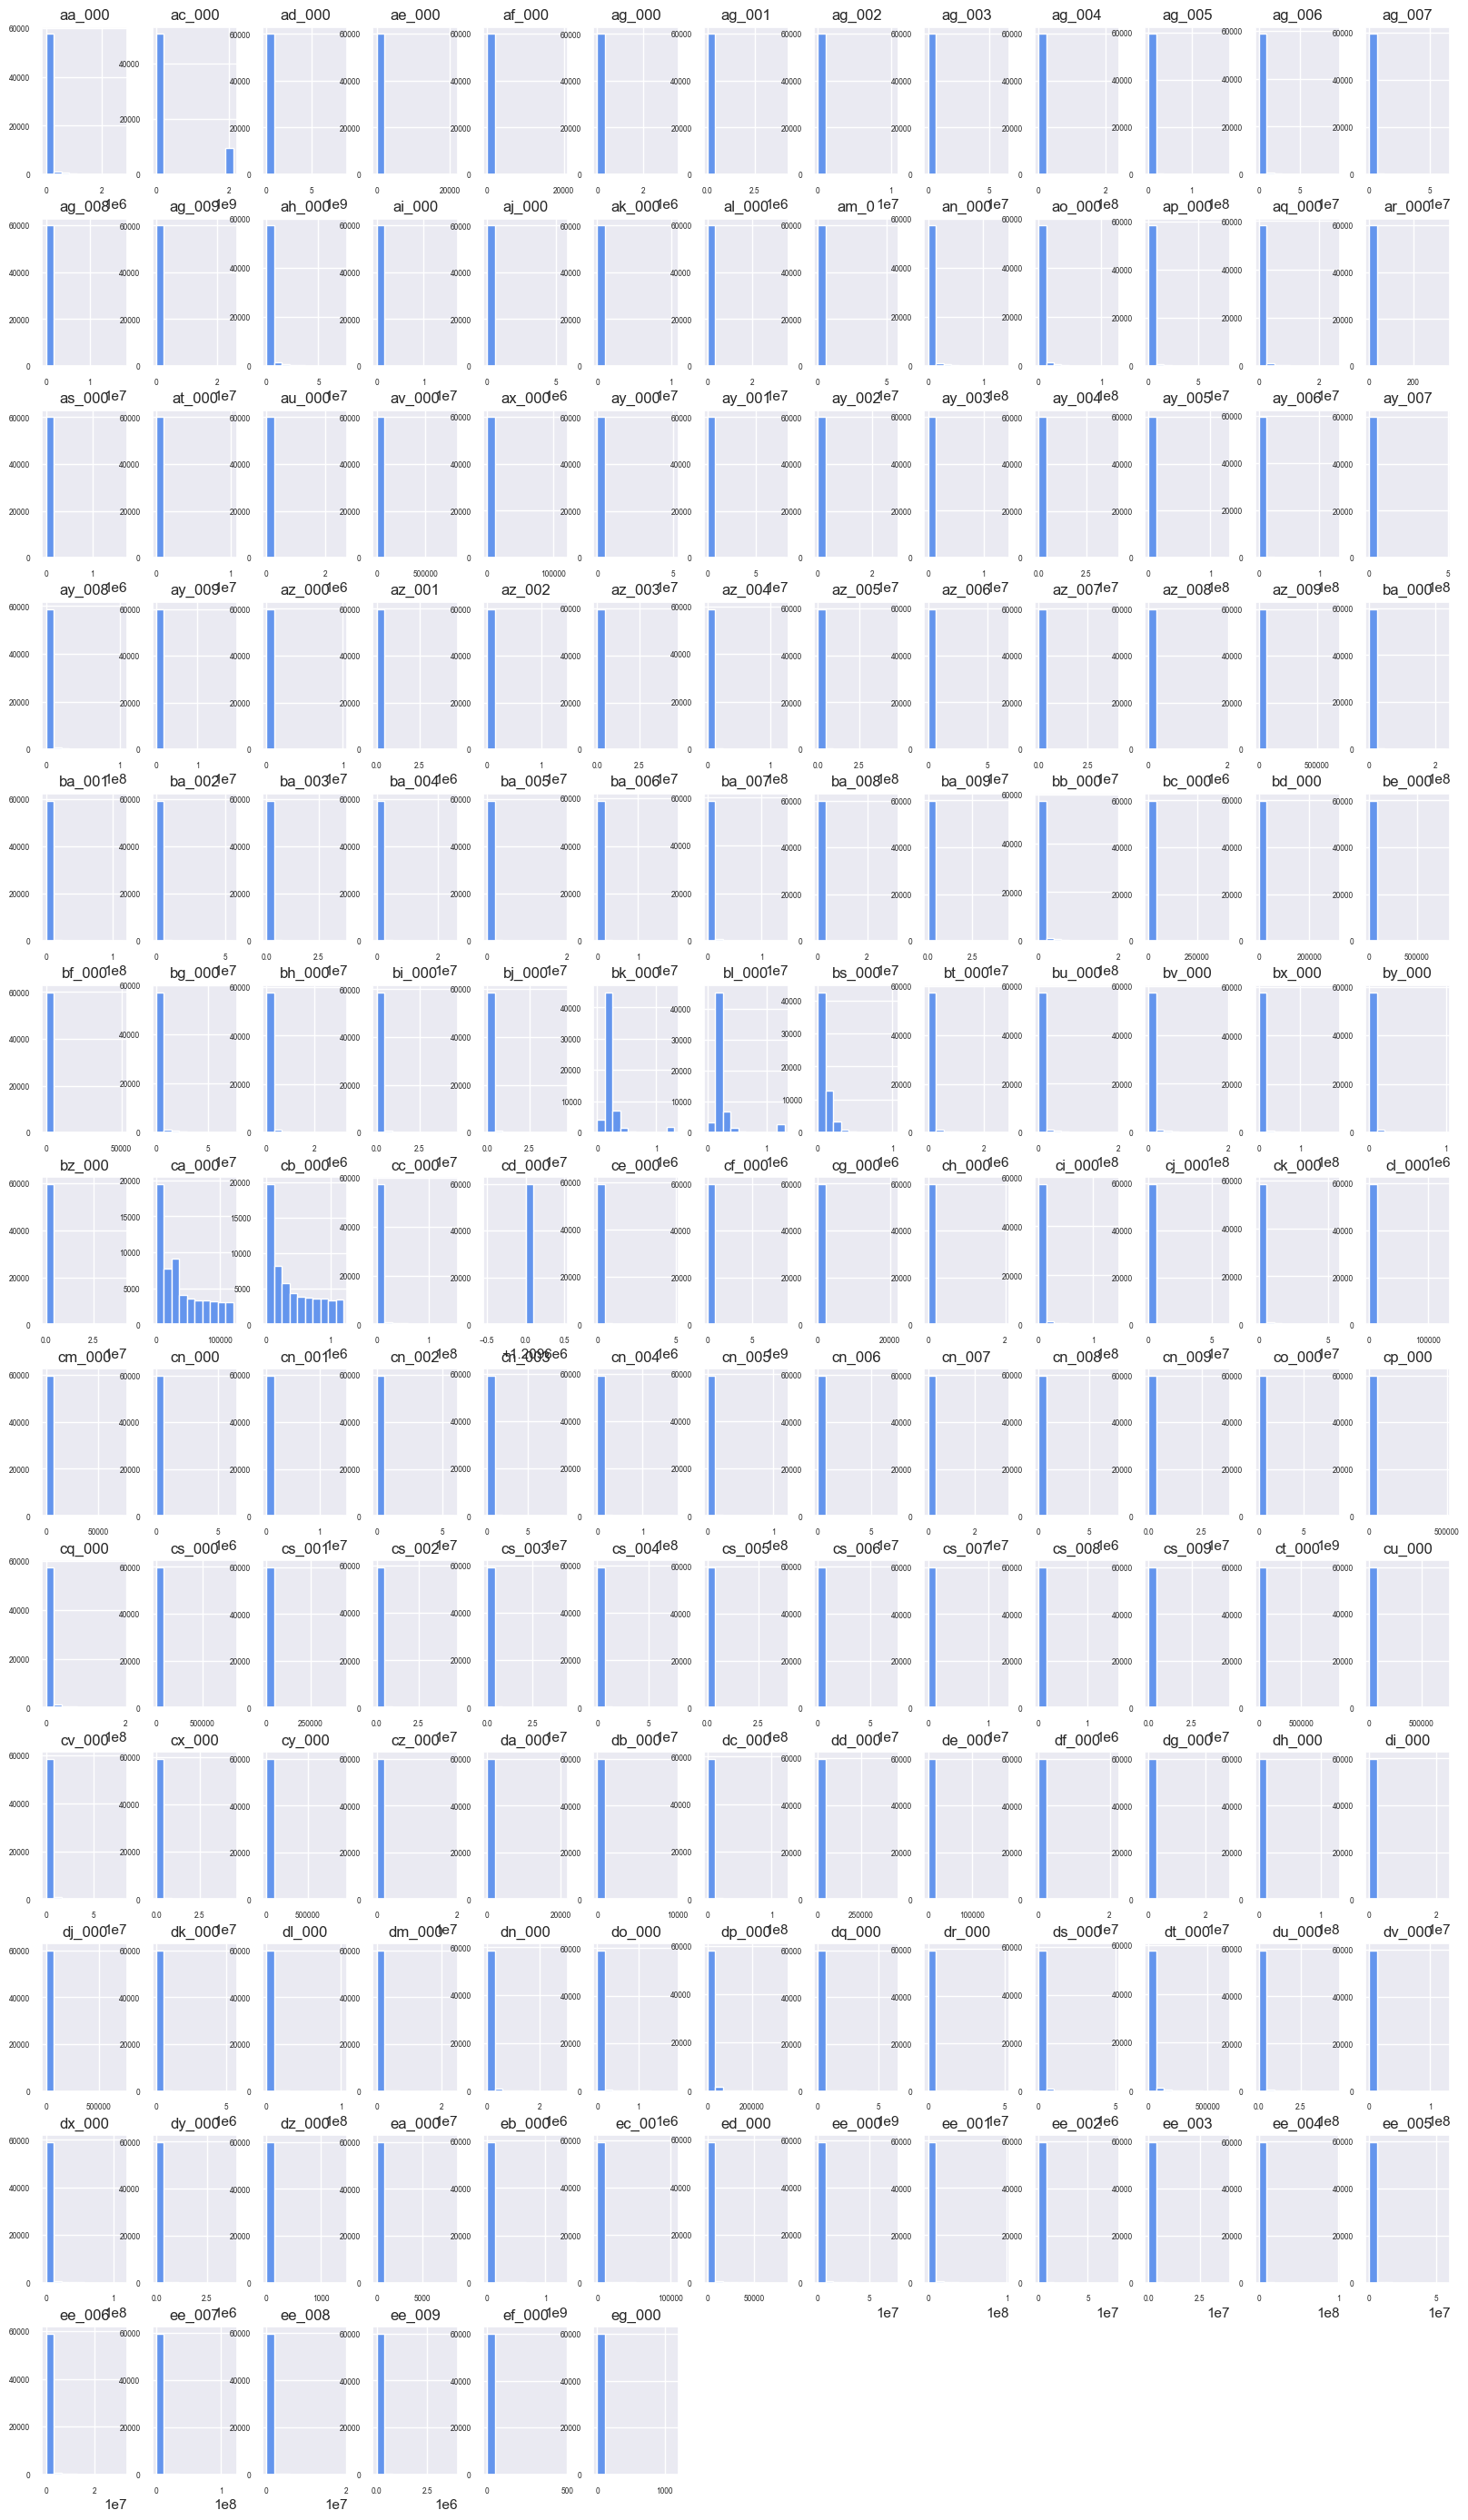

In [36]:
sns.set_theme(style = "darkgrid")
df_aps_without_label.hist(figsize = (20,35), bins = 10, xlabelsize = 6, ylabelsize = 6, color = 'cornflowerblue')

plt.show()

# Data Normalization

Data normalization is often used in data preprocessing to improve the accuracy and performance of machine learning models. This is because some models are sensitive to the scale of the data, and therefore normalizing the data helps the model fit the data better and make better predictions.

There are several types of data normalization, some of the most common are:

- Min-max normalization: scaling of the data in a specific range (for example, from 0 to 1).


- Z-score normalization: the transformation of the data so that they have a mean of 0 and a standard deviation of 1.


- Scaling by mean deviation: a variant of Z-score normalization that uses the deviated absolute mean instead of the standard deviation.


- Vector length normalization: division of each vector by its length so that it has a length of 1.


- Scaling of units: normalization of the data so that they have a variance of 1.


- Robustness Scaling: Scaling the data using percentiles instead of the mean and standard deviation, making it less susceptible to outliers.


- Logarithmic Scaling: Scaling of the data by applying the logarithmic function.


- Standard deviation scaling (also known as standardization): A data normalization method that converts the values of a variable to a common scale with zero mean and unit standard deviation. This means that the data is centred around zero and has a similar spread.


In this case, we will use Standardization Scaling, since it is useful when you want to give less weight to extreme values and when you want to fit the data to a standard normal distribution. This method is useful when working with models that require the data to be on a common scale, especially when using methods that involve the distance between the data, such as linear regression, SVM, and KNN. In addition, standardization can also help detect outliers and improve the convergence of the machine-learning algorithm.


- from sklearn.preprocessing import StandardScaler: here we are importing the StandardScaler class from the preprocessing module of the sklearn package. The StandardScaler class is an implementation of standard deviation scaling (also known as standardization).


- scaler = StandardScaler(): This line creates an instance of the StandardScaler class and stores it in the variable we created. Here we are applying the scaling to the data.


- df_aps_without_label_scaled = scaler.fit_transform(df_aps_without_label): Here the scaling is applied to the data of our Data Frame "df_aps_without_label". The fit_transform method fits the scaler to the data and then transforms the data. The result of this operation is a NumPy array containing the scaled data.


- df_aps_without_label_scaled = pd.DataFrame(df_aps_without_label_scaled, columns=df_aps_without_label.columns): This line converts the Numpy array containing the scaled data of our Data Frame. The column names of the new DataFrame are taken from our original Data Frame "df_aps_without_label". In this way, the structure of the original data is preserved, but with the values scaled.

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_aps_without_label_scaled = scaler.fit_transform(df_aps_without_label)

df_aps_without_label_scaled = pd.DataFrame(df_aps_without_label_scaled, columns = df_aps_without_label.columns)

In [38]:
df_aps_without_label_scaled.head(-5)

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.119381,2.310224,-0.004085,-0.041322,-0.051358,-0.010762,-0.02837,-0.056929,-0.115643,-0.167274,...,0.693832,0.524393,0.239087,0.070072,0.008264,-0.107586,-0.143103,-0.175699,-0.020257,-0.023540
1,-0.180697,-0.432859,-0.004089,-0.041322,-0.051358,-0.010762,-0.02837,-0.056929,-0.115643,-0.175319,...,-0.018901,-0.059135,-0.129021,-0.131171,-0.184975,-0.152281,-0.088650,-0.143927,-0.020257,-0.023540
2,-0.125811,-0.432859,-0.004090,-0.041322,-0.051358,-0.010762,-0.02837,-0.056929,-0.115643,-0.182351,...,-0.144217,-0.092912,-0.016553,0.016053,-0.009047,-0.107547,-0.094124,-0.164812,-0.020257,-0.023540
3,-0.407928,-0.432859,-0.004091,-0.041322,-0.002669,-0.010762,-0.02837,-0.056929,-0.115223,-0.182112,...,-0.385361,-0.388574,-0.381387,-0.351244,-0.310645,-0.199493,-0.306838,-0.175699,0.916833,3.685328
4,0.010572,-0.432857,-0.004080,-0.041322,-0.051358,-0.010762,-0.02837,-0.056929,-0.115643,-0.164521,...,0.155656,0.036588,-0.032641,-0.039892,-0.040823,-0.018211,0.663519,-0.149900,-0.020257,-0.023540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59990,0.151397,2.310224,-0.004089,-0.041322,-0.051358,-0.010762,-0.02837,-0.056929,-0.115643,-0.156776,...,0.160527,0.307215,0.420486,0.577217,0.323717,-0.105660,-0.299494,-0.175699,-0.020257,-0.023540
59991,-0.137720,-0.432858,-0.004082,-0.041322,-0.051358,-0.010762,-0.02837,-0.056929,-0.115643,-0.181540,...,-0.113722,-0.089430,-0.103089,-0.089076,-0.075466,-0.107772,0.218489,0.025648,-0.020257,-0.023540
59992,-0.407914,-0.432859,-0.004093,-0.041322,-0.051358,-0.010762,-0.02837,-0.056929,-0.115104,-0.181662,...,-0.385455,-0.388577,-0.381368,-0.351237,-0.310603,-0.199493,-0.306838,-0.175699,-0.020257,-0.023540
59993,-0.408011,-0.432859,-0.004093,-0.041322,-0.051358,-0.010762,-0.02837,-0.056929,-0.115643,-0.183043,...,-0.385570,-0.388659,-0.381437,-0.351283,-0.310654,-0.199493,-0.306838,-0.175699,-0.020257,-0.023540


# Principal Component Analysis (PCA)

After having normalized our Data Frame we will apply the PCA.

PCA (Principal Component Analysis) This is a dimensionality reduction technique that we will use to reduce the number of variables in our Data Frame while maintaining as much information as possible.

To use this method we will do the following:

- First, the PCA class from the scikit-learn library is imported. A PCA object is then created with a cumulative variance of 0.995 (this means that the PCA object will retain 99.5% of the variance of the original data).


- Next, we fit the PCA object to our "df_aps_without_label_scaled" data using the fit() method.


- Then the number of principal components that will be preserved in dimensionality reduction is obtained using the n_components_ attribute of the PCA object, which in this case are 118 components.


In [39]:
from sklearn.decomposition import PCA

pca = PCA(0.995).fit(df_aps_without_label_scaled)
num_components = pca.n_components_

print('Number of Components:', num_components)

Number of Components: 118


This graph shows the relationship between the number of principal components and the total variance explained in the data. The variance explains how spread out the data is and is an indicator of the amount of information that is preserved by reducing the dimensionality. In this case, the Principal Component Analysis (PCA) technique is used to reduce the dimensionality of the data.

The x-axis represents the number of principal components, while the y-axis represents the cumulative explained variance in percent. The blue line shows how the cumulative explained variance changes as more principal components are added. The red vertical line shows the number of principal components that retain 99.5% of the variance in the data.

In general, the higher the cumulative explained variance, the better the model's ability to retain important information about the data, while reducing model complexity. Therefore, the graph can be used to determine the optimal number of principal components to retain for a given data set.

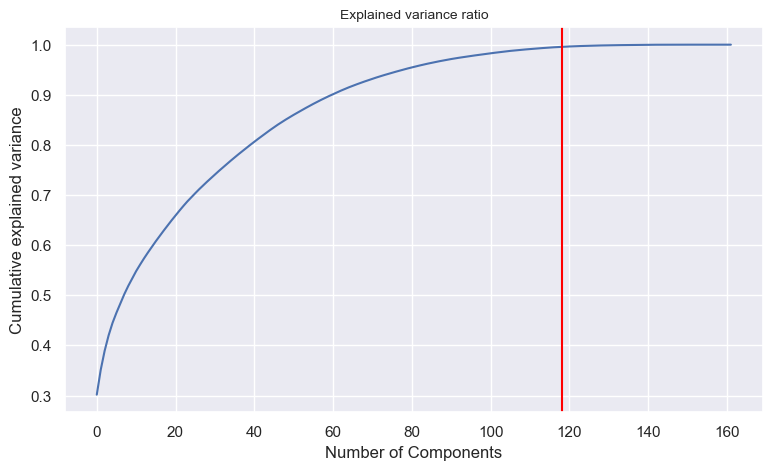

In [40]:
plt.rcParams["figure.figsize"] = (9,5)

pca = PCA().fit(df_aps_without_label_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Explained variance ratio', fontsize = 10)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative explained variance')
plt.axvline(num_components, color = 'red')

Here we introduce the 118 new components created by the PCA into our "projected" variable, which contains 60000 data and 118 columns.

In [41]:
pca = PCA(118)

projected = pca.fit_transform(df_aps_without_label_scaled)

projected.shape

(60000, 118)

### Assigning names to the new columns

After having applied the PCA we have a total of 118 components, what we will do next is modify the name of these columns and later we will add our label called "class" that we had previously separated from our data, so we will have our new Data Frame.


In order to modify the names of the columns we will do the following:

- We create a new Data Frame from the data found in our "projected" variable.


- Later we create a list with the new column names using list comprehension and the "range" function. The list comprehension creates a list of strings containing the capital letter "A" followed by the corresponding column number. The range(118) function returns a sequence of integers from 0 to 117, which is used to generate the column numbers.


- Finally, the new column names are assigned to the "df_projected" data frame using the property columns. This sets the first column to be called "A1", the second "A2" and so on, up to column 118 which will be called "A118".

In [42]:
import pandas as pd

df_projected = pd.DataFrame(projected)

new_col_names = [f"A{i+1}" for i in range(118)]
df_projected.columns = new_col_names

In [43]:
df_projected.head(-5)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A109,A110,A111,A112,A113,A114,A115,A116,A117,A118
0,2.370109,-1.173316,1.899632,-0.060218,0.750227,-0.398508,0.005011,-0.348753,-1.358148,-0.942016,...,0.172891,0.339175,0.575976,0.093584,-0.072377,-0.418038,-0.133607,-0.136709,0.024463,-0.184854
1,-0.620366,-0.552837,0.069060,-0.117031,0.053238,-0.171584,-0.008234,0.182780,0.313255,-0.174585,...,-0.066930,0.279083,-0.351724,-0.254268,0.449116,-0.640858,-0.508384,-0.125441,-0.016486,0.089644
2,-1.211995,-0.110978,-0.237763,-0.146611,0.243909,0.071734,-0.014482,-0.155625,0.054438,0.481592,...,-0.083870,-0.057446,0.032023,-0.005250,-0.016747,0.070815,-0.053677,-0.005757,-0.011371,-0.001019
3,-3.194907,0.224803,-0.761693,0.264186,-0.154487,0.237237,-0.023598,0.563016,0.939585,0.851131,...,0.087370,0.051816,-0.030375,0.001930,0.013814,-0.015633,0.011608,-0.001612,-0.026544,0.021682
4,0.317832,-0.099276,0.843198,-0.577345,0.214998,-0.070133,0.011109,-0.519218,-1.079808,-0.785517,...,0.087753,-0.139251,-0.242650,-0.064359,0.179313,-0.114845,-0.135125,-0.012867,-0.096313,0.012938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59990,1.097785,-0.816575,1.032966,-1.123109,1.369241,-0.812068,-0.010014,-0.027181,-0.746928,-0.151900,...,-0.314986,0.012759,0.100380,0.042503,-0.037026,0.136364,0.028372,-0.263001,0.031799,0.142703
59991,-1.193166,-0.132242,-0.111159,-0.163133,0.237052,0.150669,-0.022028,0.107409,0.419949,0.858762,...,0.101878,-0.049276,0.017767,0.051128,-0.018675,-0.002661,-0.063799,0.042586,-0.073082,-0.030826
59992,-3.214503,0.149248,-0.850306,0.294729,-0.146087,0.229550,-0.024224,0.482565,0.898035,0.899822,...,0.059198,0.027336,-0.023771,-0.006942,0.011320,0.007374,0.026620,0.011782,-0.012134,0.008630
59993,-3.205014,0.160462,-0.832700,0.286031,-0.148960,0.230846,-0.023903,0.488563,0.908149,0.887340,...,0.057096,0.026203,-0.025494,-0.017871,0.023082,-0.007184,0.013822,0.005977,-0.012218,0.006961


### Adding the "class" column

Here we will add our "class" column that we had previously separated on line [26].

In [44]:
df_projected["class"] = df_aps['class']

df_projected.head(-5)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A110,A111,A112,A113,A114,A115,A116,A117,A118,class
0,2.370109,-1.173316,1.899632,-0.060218,0.750227,-0.398508,0.005011,-0.348753,-1.358148,-0.942016,...,0.339175,0.575976,0.093584,-0.072377,-0.418038,-0.133607,-0.136709,0.024463,-0.184854,0
1,-0.620366,-0.552837,0.069060,-0.117031,0.053238,-0.171584,-0.008234,0.182780,0.313255,-0.174585,...,0.279083,-0.351724,-0.254268,0.449116,-0.640858,-0.508384,-0.125441,-0.016486,0.089644,0
2,-1.211995,-0.110978,-0.237763,-0.146611,0.243909,0.071734,-0.014482,-0.155625,0.054438,0.481592,...,-0.057446,0.032023,-0.005250,-0.016747,0.070815,-0.053677,-0.005757,-0.011371,-0.001019,0
3,-3.194907,0.224803,-0.761693,0.264186,-0.154487,0.237237,-0.023598,0.563016,0.939585,0.851131,...,0.051816,-0.030375,0.001930,0.013814,-0.015633,0.011608,-0.001612,-0.026544,0.021682,0
4,0.317832,-0.099276,0.843198,-0.577345,0.214998,-0.070133,0.011109,-0.519218,-1.079808,-0.785517,...,-0.139251,-0.242650,-0.064359,0.179313,-0.114845,-0.135125,-0.012867,-0.096313,0.012938,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59990,1.097785,-0.816575,1.032966,-1.123109,1.369241,-0.812068,-0.010014,-0.027181,-0.746928,-0.151900,...,0.012759,0.100380,0.042503,-0.037026,0.136364,0.028372,-0.263001,0.031799,0.142703,0
59991,-1.193166,-0.132242,-0.111159,-0.163133,0.237052,0.150669,-0.022028,0.107409,0.419949,0.858762,...,-0.049276,0.017767,0.051128,-0.018675,-0.002661,-0.063799,0.042586,-0.073082,-0.030826,0
59992,-3.214503,0.149248,-0.850306,0.294729,-0.146087,0.229550,-0.024224,0.482565,0.898035,0.899822,...,0.027336,-0.023771,-0.006942,0.011320,0.007374,0.026620,0.011782,-0.012134,0.008630,0
59993,-3.205014,0.160462,-0.832700,0.286031,-0.148960,0.230846,-0.023903,0.488563,0.908149,0.887340,...,0.026203,-0.025494,-0.017871,0.023082,-0.007184,0.013822,0.005977,-0.012218,0.006961,0


# Testing Models

Now we are going to test different Machine Learning (ML) models to see which is the most optimal model with the data we have.

In the case of obtaining a low performance, we must change the number of functions of our PCA.

In this case, we will create a new variable called "df_arrays" in which we will include our Data Frame "df_projected" in the form of arrays, in this way, we can manage our data in a better way to test the Machine Learning models.

In [45]:
df_arrays = df_projected.values
df_arrays

array([[ 2.37010912e+00, -1.17331635e+00,  1.89963208e+00, ...,
         2.44633387e-02, -1.84853629e-01,  0.00000000e+00],
       [-6.20365710e-01, -5.52837052e-01,  6.90598256e-02, ...,
        -1.64855202e-02,  8.96438678e-02,  0.00000000e+00],
       [-1.21199549e+00, -1.10977893e-01, -2.37763392e-01, ...,
        -1.13710422e-02, -1.01853837e-03,  0.00000000e+00],
       ...,
       [-3.20653905e+00,  1.33576140e-01, -7.53515906e-01, ...,
         2.67824889e-02, -1.20237862e-02,  0.00000000e+00],
       [ 2.38002521e+00, -2.56438900e+00,  2.15057350e+00, ...,
        -6.77017524e-01,  6.51586179e-01,  0.00000000e+00],
       [-7.30547648e-01, -4.38124835e-01,  3.00520679e-01, ...,
        -2.24254522e-02,  5.57260813e-02,  0.00000000e+00]])

Here we divide the data set into training and validation sets for further use of the learning models.

We will establish 30% for testing and 70% for data training.

In [46]:
from sklearn.model_selection import train_test_split
X = df_arrays[:,0:118]
y = df_arrays[:,118]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size = 0.3, random_state=1)
X_train.shape, X_validation.shape, Y_train.shape, Y_validation.shape

((42000, 118), (18000, 118), (42000,), (18000,))

Here we divide the data set into training and validation sets for further use of the learning models.

We will establish 30% for testing and 70% for data training.

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from matplotlib import pyplot

Here we are creating a list of tuples that will contain the different Machine Learning models. Each tuple has two elements, a short model name and the model object itself.

Here we will define 5 different models:

- The first model is a Naive Bayes Gaussian classifier, abbreviated as "NB".


- The second model is a support vector machine, abbreviated as "SVM".


- The third model is a random forest classifier, abbreviated as "RFC".


- The fourth model is a decision tree, abbreviated as "CART".


- The fifth model is a logistic regression, abbreviated as "LR".


In [48]:
models = []
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RFC', RandomForestClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))

Here we are going to evaluate the models that we previously selected to compare their performance and to be able to choose the most suitable one for our analysis.

In this case, the model with the best performance is the Random Forest Classifier (RFC) with a performance of 0.99.

In [49]:
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

NB: 0.963071 (0.002944)
SVM: 0.985857 (0.000805)
RFC: 0.990714 (0.000987)
CART: 0.984786 (0.001758)
LR: 0.989857 (0.000917)


Here we are implementing the Random Forest Classifier (RFC) model and evaluating its performance:


- We use the "accuracy_score" function of the scikit-learn metrics module to calculate the accuracy score of the model. The accuracy score is defined as the fraction of correct predictions out of the total number of predictions made. Accuracy is a measure of the quality of the model and is a number between 0 and 1, where a value close to 1 indicates a very accurate model.


- We use the "classification_report" function of the scikit-learn metrics module to print a classification report showing some evaluation metrics like accuracy, recall and F1-score for each class. This report provides an overview of the model's performance in each class and can be helpful in determining if the model is biased towards any classes.


- We are also creating a confusion matrix using the "confusion_matrix" function of the scikit-learn metrics module. The confusion matrix is a table showing the number of true positives, false positives, true negatives, and false negatives in the validation data set. This matrix is very useful to analyze the performance of the model in each class. The seaborn library is then used to display the confusion matrix in a heat map. Matrix values are displayed in each cell of the heatmap, and the colour intensity indicates the number of predictions for each combination of true positive, true negative, false positive, and false negative.


- Accuracy refers to the proportion of positive cases that the model correctly predicts.


- The recall refers to the proportion of real positive cases that the model correctly identifies.


- The f1-score is a measure of balanced accuracy and recall. The weighted average precision is calculated as the weighted average of the precision of each class, with the number of samples in each class as the weight. The weighted macro precision is the unweighted mean of the precision of each class.

The classification report also shows the number of samples in each class (in this case, 17716 from the "0.0" class and 284 from the "1.0" class), and the accuracy, which is the proportion of cases totals that the model correctly predicts.

In summary, the classification report provides an overview of the performance of the classification model in terms of the precision, recall, and f1-score of each class, and also in terms of the measures of weighted average precision, weighted macro precision, and accuracy. 

Accuracy Score:  0.9920555555555556

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     17716
         1.0       0.85      0.60      0.70       284

    accuracy                           0.99     18000
   macro avg       0.92      0.80      0.85     18000
weighted avg       0.99      0.99      0.99     18000


Confusion Matrix: 
 [[17687    29]
 [  114   170]]


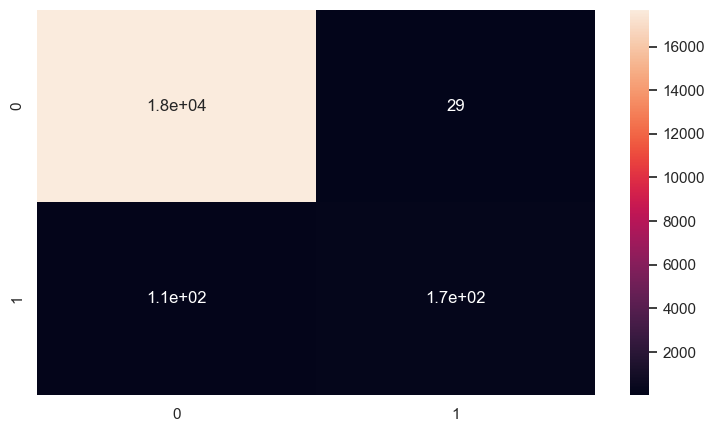

In [67]:
model = RandomForestClassifier(n_estimators = 250, max_depth = 20, random_state = 1)
model.fit(X_train, Y_train)
y_pred = model.predict(X_validation)

print("Accuracy Score: ", accuracy_score(Y_validation, y_pred))

print("\nClassification Report: "'\n', classification_report(Y_validation, y_pred))

cm = confusion_matrix(Y_validation, y_pred)
sns.heatmap(cm, annot = True)

print("\nConfusion Matrix: "'\n', confusion_matrix(Y_validation, y_pred))

# Conclusion

Based on the results of the RandomForestClassifier model, we can conclude that the model has high precision with an accuracy score of 99.2%. The model also has high accuracy for the negative class, with a true positive (recall) rate of 100%, which means that the model is very good at identifying trucks with no APS system failures.

However, the accuracy of the model for the positive class is relatively low, with a true positive (recall) rate of 60%, indicating that the model may not be very good at identifying trucks with APS failures.

Therefore, it is suggested that the transportation company focus on the improvement of the maintenance and inspection of the APS system components on the trucks, in order to reduce the number of trucks with failures in this system and, therefore, improve the quality of the truck. model accuracy for the positive class, so investment in technologies and practices that continuously improve and monitor the performance of the air pressure system (APS) on Scania heavy trucks could be considered.

It is important to note that this analysis is based on a subset of the available data, and that additional analysis with more comprehensive data may be necessary to make more informed decisions about the company's investment strategy. In addition, we have a number of negative data of 59,000 and the number of positives is 1,000, this means that the data is biased since the negative cases are proportionally equivalent to 98.33% of all the data and the positive cases are equivalent to 1.67%.

# Curse of Dimensionality


The "Curse of Dimensionality" is a problem that arises in machine learning and other areas in which high-dimensionality data sets are handled.

Basically, it refers to the fact that as the number of dimensions or features in a data set increases, the search space expands exponentially. This means that more and more data is needed to get an accurate representation of the space and avoid problems like overfitting.

For example, if we consider a data set with only two features, we can easily visualize this data set in a two-dimensional graph. But, if the number of features increases to 100 or more, we can no longer display them on a graph.

Furthermore, the number of points needed to effectively cover the search space also increases exponentially as the number of features increases.

In short, the "Curse of Dimensionality" refers to the difficulty that arises when working with high-dimensionality data sets, which can make it difficult to make decisions and process data effectively.

# References:

- GeeksforGeeks., 2021. Exploratory Data Analysis by KattamuriMeghna. Available at: https://www.geeksforgeeks.org/exploratory-data-analysis-in-python/


- Scribbr, Published on January 28, 2020 by Rebecca Bevans. Available at: https://www.scribbr.com/statistics/statistical-tests/


- Scribbr, Published on December 8, 2021 by Pritha Bhandari. Available at: https://www.scribbr.com/statistics/missing-data/


- W3schools, Pandas DataFrame astype() Method. Available at: https://www.w3schools.com/python/pandas/ref_df_astype.asp


- Microsoft, Normalize Data component. Article 11/04/2021. Available at: https://learn.microsoft.com/en-us/azure/machine-learning/component-reference/normalize-data?view=azureml-api-2


- Scikit-Learn, sklearn.preprocessing.StandardScaler, Available at: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html


- Analytics Vidhya by Aniruddha Bhandari — Published On April 3, 2020. Available at: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/


- GeeksforGeeks. ML | Principal Component Analysis(PCA), by aishwarya.27. Available at: https://www.geeksforgeeks.org/ml-principal-component-analysispca/


- Scikit-Learn, sklearn.decomposition.PCA. Available at:https://scikitlearn.org/stable/modules/generated/sklearn.decomposition.PCA.html


- Medium Dec 25, 2019, by Aayush Bajaj. Available at: https://towardsdatascience.com/what-does-your-classification-metric-tell-about-your-data-4a8f35408a8b#:~:text=A%20low%20recall%20score%20